<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Création-des-différents-dataframes" data-toc-modified-id="1.-Création-des-différents-dataframes-1">1. Création des différents dataframes</a></span></li><li><span><a href="#2.-Choix-des-variables-et-fusion-des-données" data-toc-modified-id="2.-Choix-des-variables-et-fusion-des-données-2">2. Choix des variables et fusion des données</a></span><ul class="toc-item"><li><span><a href="#2.1.-Choix-des-variables" data-toc-modified-id="2.1.-Choix-des-variables-2.1">2.1. Choix des variables</a></span><ul class="toc-item"><li><span><a href="#2.1.1.-Customers" data-toc-modified-id="2.1.1.-Customers-2.1.1">2.1.1. Customers</a></span></li><li><span><a href="#2.1.2.-Geolocation" data-toc-modified-id="2.1.2.-Geolocation-2.1.2">2.1.2. Geolocation</a></span></li><li><span><a href="#2.1.3.-Orders" data-toc-modified-id="2.1.3.-Orders-2.1.3">2.1.3. Orders</a></span></li><li><span><a href="#2.1.4.-Order-Items" data-toc-modified-id="2.1.4.-Order-Items-2.1.4">2.1.4. Order Items</a></span></li><li><span><a href="#2.1.5.-Order-Payments" data-toc-modified-id="2.1.5.-Order-Payments-2.1.5">2.1.5. Order Payments</a></span></li><li><span><a href="#2.1.6.-Order-Reviews" data-toc-modified-id="2.1.6.-Order-Reviews-2.1.6">2.1.6. Order Reviews</a></span></li><li><span><a href="#2.1.7.-Products,-Sellers-et-Product-Category-Name-Translation" data-toc-modified-id="2.1.7.-Products,-Sellers-et-Product-Category-Name-Translation-2.1.7">2.1.7. Products, Sellers et Product Category Name Translation</a></span></li></ul></li><li><span><a href="#2.2.-Fusion-des-données" data-toc-modified-id="2.2.-Fusion-des-données-2.2">2.2. Fusion des données</a></span></li><li><span><a href="#2.3.-Aggrégation-des-données" data-toc-modified-id="2.3.-Aggrégation-des-données-2.3">2.3. Aggrégation des données</a></span></li></ul></li><li><span><a href="#3.-Analyse-des-données" data-toc-modified-id="3.-Analyse-des-données-3">3. Analyse des données</a></span><ul class="toc-item"><li><span><a href="#3.1.-Clients" data-toc-modified-id="3.1.-Clients-3.1">3.1. Clients</a></span></li><li><span><a href="#3.2.-Commandes" data-toc-modified-id="3.2.-Commandes-3.2">3.2. Commandes</a></span></li><li><span><a href="#3.3.-Corrélations" data-toc-modified-id="3.3.-Corrélations-3.3">3.3. Corrélations</a></span></li></ul></li><li><span><a href="#4.-Création-du-jeu-de-données-final" data-toc-modified-id="4.-Création-du-jeu-de-données-final-4">4. Création du jeu de données final</a></span></li></ul></div>

# Segmentez des clients d'un site e-commerce - Exploration

Olist est une entreprise brésilienne qui propose une solution de vente sur les marketplaces en ligne.

Elle souhaite qu'on fournisse à ses équipes d'e-commerce une segmentation des clients qu’elles pourront utiliser au quotidien pour leurs campagnes de communication.

L'objectif est de comprendre les différents types d’utilisateurs grâce à leur comportement et à leurs données personnelles.

On doit fournir à l’équipe Marketing une description actionable de notre segmentation et de sa logique sous-jacente pour une utilisation optimale, ainsi qu’une proposition de contrat de maintenance basée sur une analyse de la stabilité des segments au cours du temps.

Notre mission est d’aider les équipes d’Olist à comprendre les différents types d'utilisateurs. Des méthodes non supervisées vont être utilisées pour regrouper des clients de profils similaires. Ces catégories pourront être utilisées par l’équipe Marketing pour mieux communiquer.

Ce premier notebook contient le travail d’analyse exploratoire.

In [1]:
import os

import matplotlib as mlp
import numpy as np
import pandas as pd
import seaborn as sns
import sys

from matplotlib import pyplot as plt

Les données sont segmentées en 9 différents fichiers csv. On va créer un dataframe pour chacun et vérifier leur intéret pour la suite du projet.

In [2]:
os.listdir("data/source/")

['olist_customers_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_orders_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_order_reviews_dataset.csv',
 'olist_products_dataset.csv',
 'olist_sellers_dataset.csv',
 'product_category_name_translation.csv']

## 1. Création des différents dataframes

In [3]:
path = "./data/source/"

In [4]:
# create customers dataframe
customers = pd.read_csv(path + "olist_customers_dataset.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [5]:
# create geolocation dataframe
geolocation = pd.read_csv(path + "olist_geolocation_dataset.csv")
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [6]:
# create orders dataframe
orders = pd.read_csv(path + "olist_orders_dataset.csv")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
# create order_items dataframe
order_items = pd.read_csv(path + "olist_order_items_dataset.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [8]:
# create order_payments dataframe
order_payments = pd.read_csv(path + "olist_order_payments_dataset.csv")
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [9]:
# create order_reviews dataframe
order_reviews = pd.read_csv(path + "olist_order_reviews_dataset.csv")
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [10]:
# create products dataframe
products = pd.read_csv(path + "olist_products_dataset.csv")
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [11]:
# create sellers dataframe
sellers = pd.read_csv(path + "olist_sellers_dataset.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [12]:
# create product_category_name_translation dataframe
product_category_name_translation = pd.read_csv(
    path + "product_category_name_translation.csv")
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## 2. Choix des variables et fusion des données

Voici une représentation des différents fichiers et leurs relations entre eux :

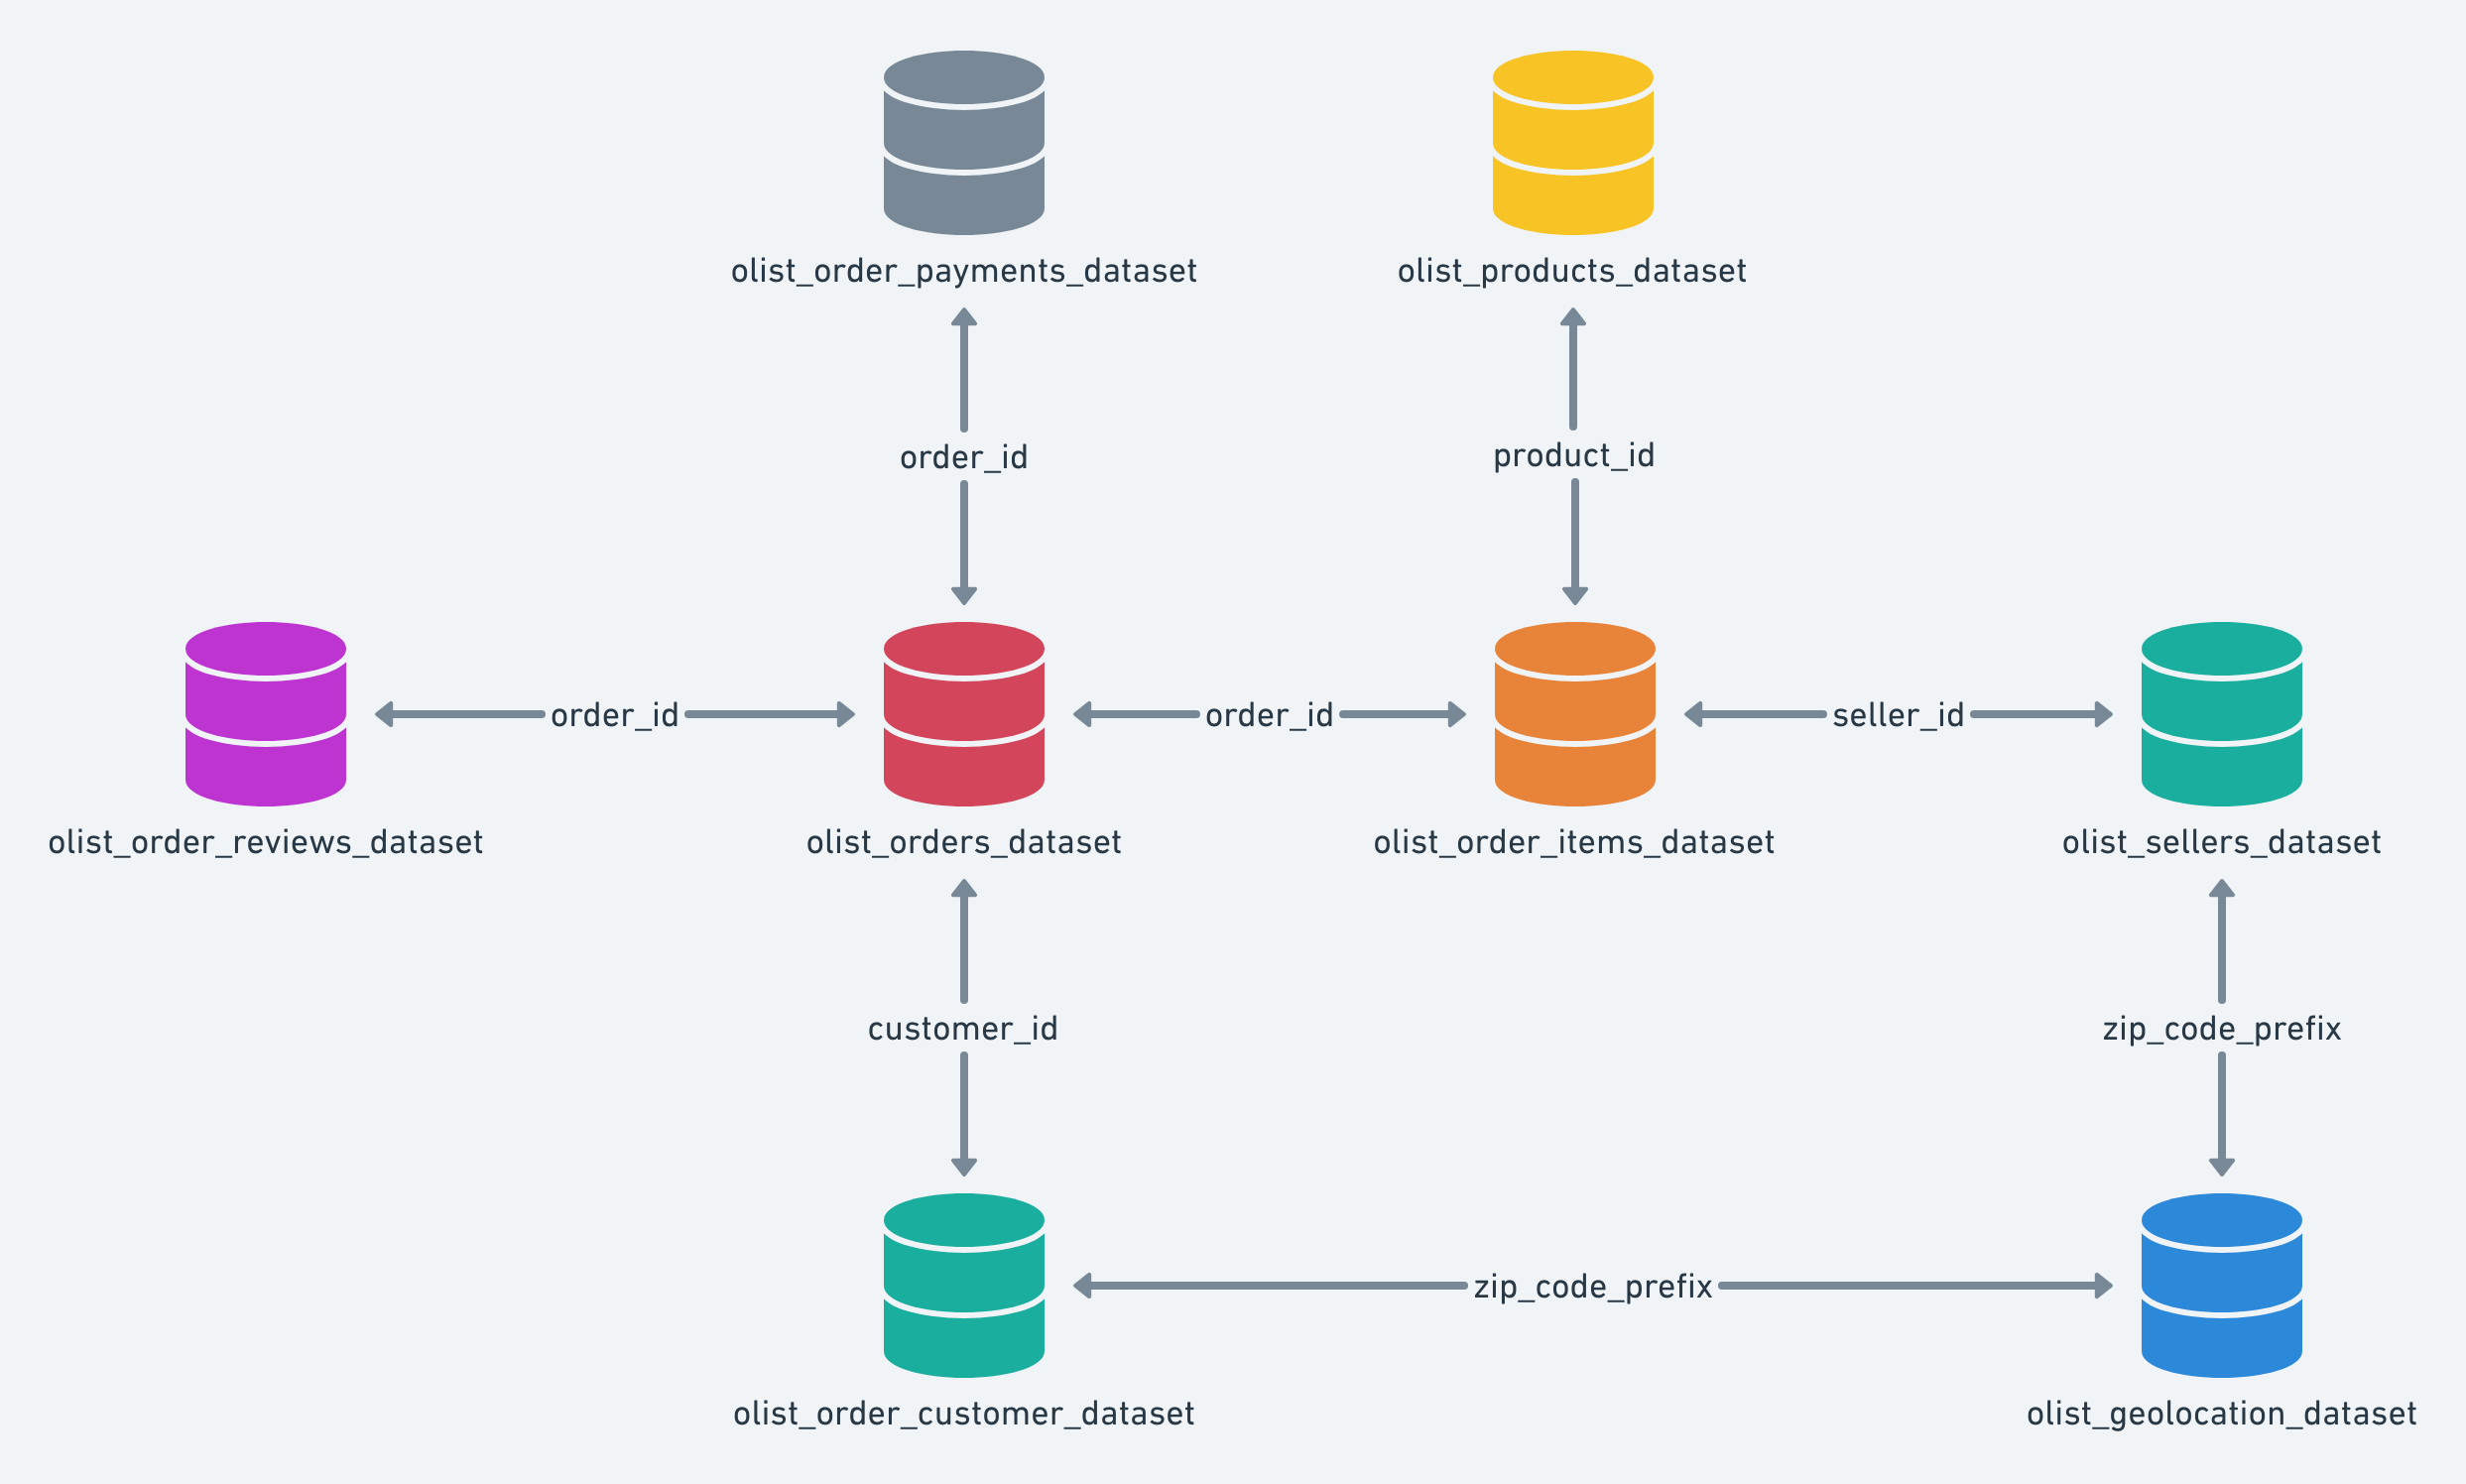

### 2.1. Choix des variables

On va d'abord sélectionner les variables qui nous intéressent pour chaque fichier.

#### 2.1.1. Customers

Je ne vais garder que les variables customer_id, customer_unique_id et customer_state dans ce dataframe.

In [13]:
customers.drop(['customer_city', 'customer_zip_code_prefix'],
               axis=1, inplace=True)

In [14]:
customers.head()

,customer_id,customer_unique_id,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,SP


#### 2.1.2. Geolocation

Je ne garde pas ces données pour la suite du projet.

#### 2.1.3. Orders

Je ne vais garder que les variables order_id, customer_id, order_status et order_purchase_timestamp. A partir de order_approved_at et order_delivered_customer_date je vais créer une nouvelle variable delivery_time.

In [15]:
# calculate delivery_time
orders["delivery_time"] = (pd.to_datetime(orders["order_delivered_customer_date"], errors='coerce') -
                           pd.to_datetime(orders["order_approved_at"], errors='coerce')) / np.timedelta64(1, 'D')

In [16]:
orders.drop(['order_delivered_carrier_date', 'order_delivered_customer_date',
            'order_estimated_delivery_date', 'order_purchase_timestamp'], axis=1, inplace=True)

In [17]:
orders.head()

,order_id,customer_id,order_status,order_approved_at,delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 11:07:15,8.429144
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-26 03:24:27,12.502292
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:55:23,9.382708
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:45:59,13.196331
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 22:20:29,2.830938


#### 2.1.4. Order Items

Je ne vais garder que les variables order_id, product_id et price.

In [18]:
order_items.drop(['order_item_id', 'seller_id',
                 'shipping_limit_date', 'freight_value'], axis=1, inplace=True)

In [19]:
order_items.head()

,order_id,product_id,price
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,58.90
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,239.90
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,199.00
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,12.99
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,199.90


#### 2.1.5. Order Payments

Je ne garde pas ces données pour la suite du projet.

#### 2.1.6. Order Reviews

Je ne vais garder que les variables order_id, et review_score.

In [20]:
order_reviews.drop(['review_id', 'review_comment_title', 'review_comment_message',
                   'review_creation_date', 'review_answer_timestamp'], axis=1, inplace=True)

In [21]:
order_reviews.head()

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5


#### 2.1.7. Products, Sellers et Product Category Name Translation

Je ne garde pas ces données pour la suite du projet.

### 2.2. Fusion des données

Je vais fusionner les différents dataframes selon le schéma donné plus haut.

In [22]:
# merge customers and orders on customer_id
data = pd.merge(customers, orders, on='customer_id', how='outer')

In [23]:
# merge data and order_items on order_id
data = pd.merge(data, order_items, on='order_id', how='outer')

In [24]:
# merge data and order_reviews on order_id
data = pd.merge(data, order_reviews, on='order_id', how='outer')

In [25]:
data.head()

,customer_id,customer_unique_id,customer_state,order_id,order_status,order_approved_at,delivery_time,product_id,price,review_score
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:22:12,8.800961,a9516a079e37a9c9c36b9b78b10169e8,124.99,4.0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:58:32,16.654711,4aa6014eceb682077f9dc4bffebc05b0,289.00,5.0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-20 16:19:10,25.069225,bd07b66896d6f1494f5b86251848ced7,139.94,5.0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 17:29:19,14.941042,a5647c44af977b148e0a3a4751a09e2e,149.94,5.0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 10:10:09,11.448368,9391a573abe00141c56e38d84d7d5b3b,230.00,5.0


Vérifions les différents statuts de commandes.

In [26]:
data['order_status'].unique()

array(['delivered', 'canceled', 'invoiced', 'shipped', 'processing',
       'unavailable', 'approved', 'created'], dtype=object)

Je vais supprimer les canceled et unavailable car ils n'aboutissent pas à une commande.

In [27]:
data = data[(data.order_status != 'canceled') &
            (data.order_status != 'unavailable')]

Puis, je vais créer 2 catégories uniquement : delivered et not_delivered qui regroupe tous les autres statuts. Puis je les transforme en variables numériques via OneHot Encoding.

In [28]:
to_replace = ['invoiced', 'shipped', 'processing', 'approved', 'created']
for status in to_replace:
    data.replace(status, 'not_delivered', inplace=True)

In [29]:
# one-hot encoding
data = pd.get_dummies(
    data, columns=['order_status'])

In [30]:
# string dates to datetime
data['order_approved_at'] = pd.to_datetime(
    data["order_approved_at"], errors='coerce')

In [31]:
data.head()

,customer_id,customer_unique_id,customer_state,order_id,order_approved_at,delivery_time,product_id,price,review_score,order_status_delivered,order_status_not_delivered
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,SP,00e7ee1b050b8499577073aeb2a297a1,2017-05-16 15:22:12,8.800961,a9516a079e37a9c9c36b9b78b10169e8,124.99,4.0,1,0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,SP,29150127e6685892b6eab3eec79f59c7,2018-01-12 20:58:32,16.654711,4aa6014eceb682077f9dc4bffebc05b0,289.00,5.0,1,0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,2018-05-20 16:19:10,25.069225,bd07b66896d6f1494f5b86251848ced7,139.94,5.0,1,0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,SP,951670f92359f4fe4a63112aa7306eba,2018-03-13 17:29:19,14.941042,a5647c44af977b148e0a3a4751a09e2e,149.94,5.0,1,0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,2018-07-29 10:10:09,11.448368,9391a573abe00141c56e38d84d7d5b3b,230.00,5.0,1,0


In [32]:
data.describe()

,delivery_time,price,review_score,order_status_delivered,order_status_not_delivered
count,110817.000000,112761.000000,111842.000000,112769.000000,112769.000000
mean,12.038337,120.202865,4.044035,0.982894,0.017106
std,9.406977,182.288221,1.378347,0.129666,0.129666
min,-6.989653,0.850000,1.000000,0.000000,0.000000
25%,6.283183,39.900000,4.000000,1.000000,0.000000
50%,9.805382,74.900000,5.000000,1.000000,0.000000
75%,15.052685,134.900000,5.000000,1.000000,0.000000
max,208.500972,6735.000000,5.000000,1.000000,1.000000


On retrouve des delivery_time négatifs, ce qui n'est pas possible. Supprimons les.

In [33]:
data.drop(data[(data['delivery_time'] < 0)].index, inplace=True)

### 2.3. Aggrégation des données

Je vais regrouper les données par client en utilisant le customer_unique_id. Pour chacun, je vais calculer le delivery_time moyen, le price total, le price moyen, et le review_score moyen. 

J'ajoute aussi 
* le nombre total de commandes,
* la récence du client,
* le pourcentage de commandes livrées.

In [34]:
# group datas by customer_unique_id and order_id to create customers_orders_df dataframe
customers_orders_df = data.groupby(['customer_unique_id', 'order_id']).agg(
    {'customer_state': 'max', 'order_approved_at': 'max', 'delivery_time': 'mean', 'price': 'mean', 'review_score': 'mean'})

In [35]:
customers_orders_df = customers_orders_df.reset_index()

In [36]:
# group datas by customer_unique_id to create customers_df dataframe
customers_df = customers_orders_df.groupby('customer_unique_id').agg(
    {'order_approved_at': 'max', 'delivery_time': 'mean', 'price': 'mean', 'review_score': 'mean'})

In [37]:
# rename some coumns
customers_df.rename(columns={'order_approved_at': 'last_order', 'delivery_time': 'mean_delivery_time',
                    'price': 'mean_price', 'review_score': 'mean_review_score'}, inplace=True)

In [38]:
# calculate total_price
customers_df['total_price'] = data.groupby(
    'customer_unique_id').agg({'price': 'sum'})

In [39]:
# calculate total_orders
customers_df['total_orders'] = data.groupby(
    'customer_unique_id').agg({'order_id': 'count'})

In [40]:
# calculate delivery_ratio
customers_df['delivered_count'] = data.groupby(
    'customer_unique_id').agg({'order_status_delivered': 'sum'})
customers_df['delivered_ratio'] = customers_df['delivered_count'] / \
    customers_df['total_orders']

In [41]:
# calculate recency
customers_df['recency'] = (
    customers_df["last_order"].max() - customers_df['last_order']).dt.days

In [42]:
customers_df = customers_df.reset_index()

In [43]:
customers_df.head()

,customer_unique_id,last_order,mean_delivery_time,mean_price,mean_review_score,total_price,total_orders,delivered_count,delivered_ratio,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 11:11:18,6.400914,129.90,5.0,129.90,1,1,1.0,116.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 18:25:44,2.984005,18.90,4.0,18.90,1,1,1.0,118.0
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,25.731759,69.00,3.0,69.00,1,1,1.0,541.0
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:49:17,20.023472,25.99,4.0,25.99,1,1,1.0,325.0
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 20:06:52,13.126435,180.00,5.0,180.00,1,1,1.0,292.0


In [44]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94931 entries, 0 to 94930
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_unique_id  94931 non-null  object        
 1   last_order          94914 non-null  datetime64[ns]
 2   mean_delivery_time  93278 non-null  float64       
 3   mean_price          94924 non-null  float64       
 4   mean_review_score   94248 non-null  float64       
 5   total_price         94931 non-null  float64       
 6   total_orders        94931 non-null  int64         
 7   delivered_count     94931 non-null  uint8         
 8   delivered_ratio     94931 non-null  float64       
 9   recency             94914 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1), uint8(1)
memory usage: 6.6+ MB


Il y a des dates nulles, supprimons les.

In [45]:
customers_df.dropna(subset=['last_order'], inplace=True)

In [46]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94914 entries, 0 to 94930
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_unique_id  94914 non-null  object        
 1   last_order          94914 non-null  datetime64[ns]
 2   mean_delivery_time  93278 non-null  float64       
 3   mean_price          94911 non-null  float64       
 4   mean_review_score   94232 non-null  float64       
 5   total_price         94914 non-null  float64       
 6   total_orders        94914 non-null  int64         
 7   delivered_count     94914 non-null  uint8         
 8   delivered_ratio     94914 non-null  float64       
 9   recency             94914 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1), uint8(1)
memory usage: 7.3+ MB


Il reste encore des valeurs nulles pour les variables mean_delivery_time, mean_price et mean_review_score. Remplaçons les valeurs manquantes par les médianes de chaque variable.

In [47]:
customers_df[['mean_delivery_time', 'mean_price', 'mean_review_score']] = customers_df[['mean_delivery_time', 'mean_price',
                                                                                        'mean_review_score']].fillna(customers_df[['mean_delivery_time', 'mean_price', 'mean_review_score']].median())

In [48]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94914 entries, 0 to 94930
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_unique_id  94914 non-null  object        
 1   last_order          94914 non-null  datetime64[ns]
 2   mean_delivery_time  94914 non-null  float64       
 3   mean_price          94914 non-null  float64       
 4   mean_review_score   94914 non-null  float64       
 5   total_price         94914 non-null  float64       
 6   total_orders        94914 non-null  int64         
 7   delivered_count     94914 non-null  uint8         
 8   delivered_ratio     94914 non-null  float64       
 9   recency             94914 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int64(1), object(1), uint8(1)
memory usage: 7.3+ MB


## 3. Analyse des données

In [49]:
customers_orders_df.describe()

,delivery_time,price,review_score
count,96395.000000,98138.000000,97414.000000
mean,12.138579,125.657969,4.116325
std,9.513100,190.058520,1.319926
min,0.007662,0.850000,1.000000
25%,6.314803,41.990000,4.000000
50%,9.856863,79.000000,5.000000
75%,15.144740,139.900000,5.000000
max,208.500972,6735.000000,5.000000


In [50]:
customers_df.describe()

,mean_delivery_time,mean_price,mean_review_score,total_price,total_orders,delivered_count,delivered_ratio,recency
count,94914.000000,94914.000000,94914.000000,94914.000000,94914.000000,94914.000000,94914.000000,94914.000000
mean,12.108202,126.315634,4.120177,142.716022,1.187201,1.166920,0.982399,242.565059
std,9.435490,190.914819,1.313557,217.338593,0.650900,0.663474,0.130634,152.959464
min,0.007662,0.850000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,6.400584,42.900000,4.000000,47.900000,1.000000,1.000000,1.000000,118.000000
50%,9.873553,79.200000,5.000000,89.900000,1.000000,1.000000,1.000000,223.000000
75%,15.027211,139.900000,5.000000,155.970000,1.000000,1.000000,1.000000,352.000000
max,208.500972,6735.000000,5.000000,13440.000000,24.000000,24.000000,1.000000,718.000000


Les deux dataframes ne semblent pas contenir de valeurs aberrantes.

### 3.1. Clients

Voyons d'abord la distribution géographique des clients.

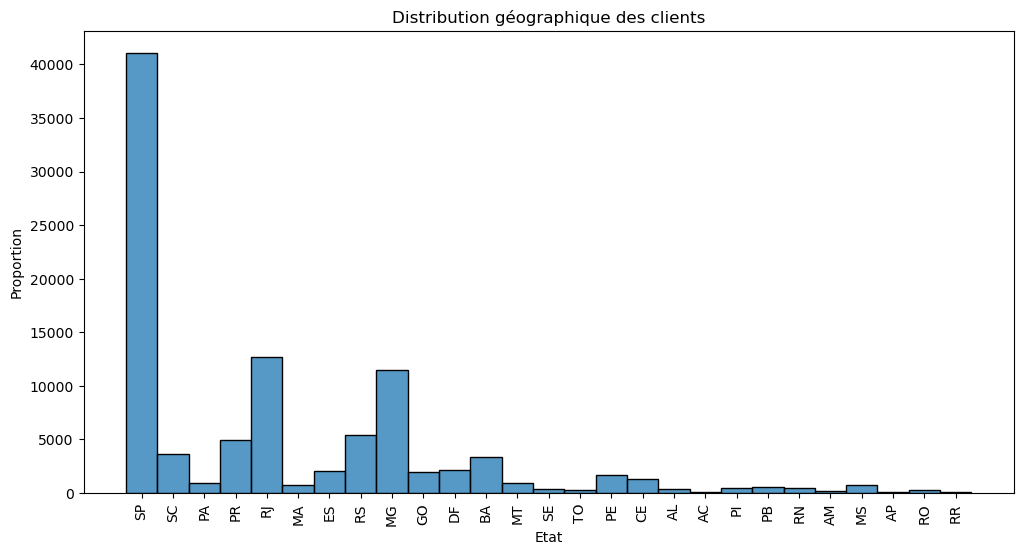

In [51]:
fig = plt.figure(figsize=(12, 6))
ax = sns.histplot(data=customers_orders_df, x='customer_state')
ax.set_xlabel("Etat")
ax.set_ylabel("Proportion")
plt.xticks(rotation=90)
plt.title("Distribution géographique des clients")
plt.show()

Les clients viennent majoritairement de l'état SP qui correspond à Soa Paulo et des villes alentours.

Voyons maintenant la récence des clients.

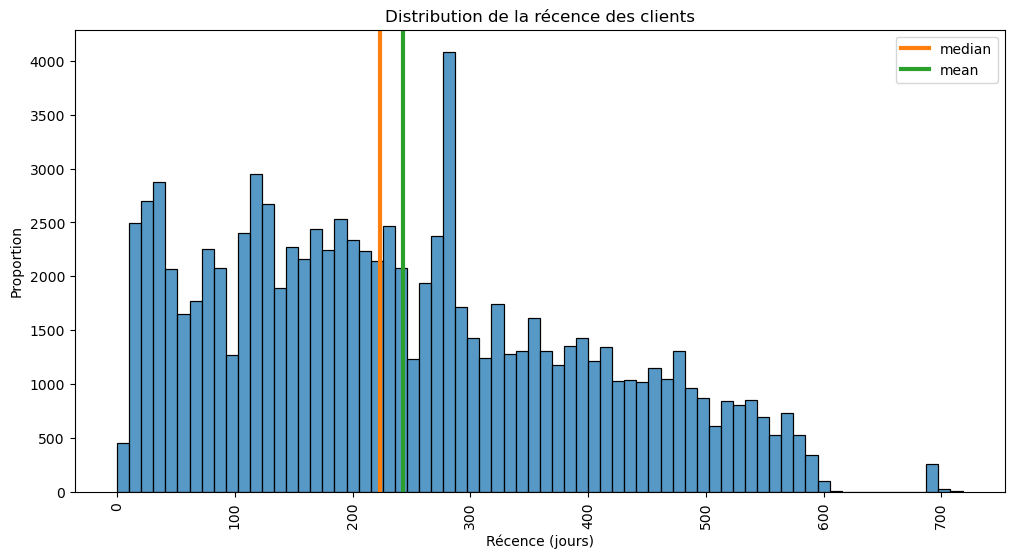

In [52]:
fig = plt.figure(figsize=(12, 6))
ax = sns.histplot(data=customers_df, x='recency')
ax.set_xlabel("Récence (jours)")
ax.set_ylabel("Proportion")
median = customers_df['recency'].median()
mean = customers_df['recency'].mean()
ax.axvline(x=median, color='tab:orange', linestyle='-', linewidth=3)
ax.axvline(x=mean, color='tab:green', linestyle='-', linewidth=3)
labels = ["median", "mean"]
plt.legend(labels=labels)
plt.xticks(rotation=90)
plt.title("Distribution de la récence des clients")
plt.show()

La majorité des clients ont une récence inférieure à 300 jours. La moyenne et la médiane se situent entre 200 et 300 jours. La proportion des clients les plus récents va en diminuant plus l'ancienneté augmente.

Voyons maintenant l'évolution du nombre de clients avec le temps.

In [53]:
# group datas by customer_unique_id and order_approved_at to create customers_by_date dataframe and calcultate number_of_clients
customers_by_date = customers_orders_df[["order_approved_at", "customer_unique_id"]].groupby(
    "order_approved_at").count().reset_index()
customers_by_date = customers_by_date.sort_values(by=['order_approved_at'])
customers_by_date['number_of_clients'] = np.cumsum(
    customers_by_date["customer_unique_id"])

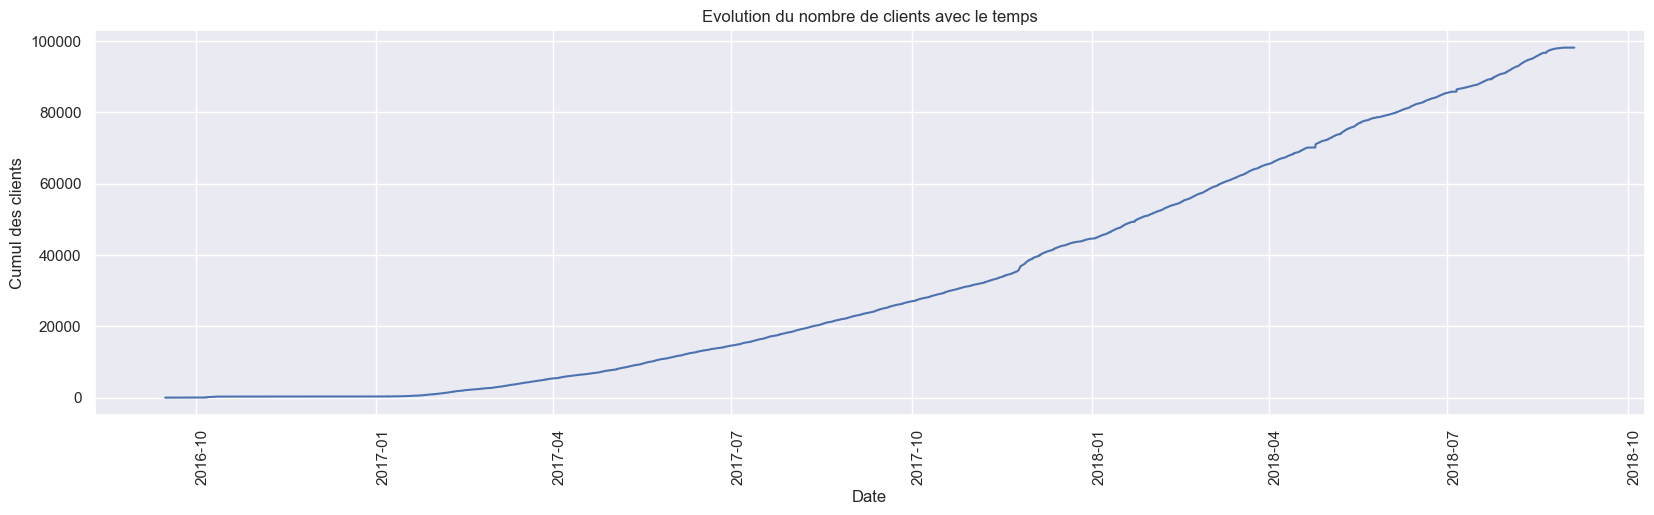

In [54]:
sns.set(font_scale=1)
plt.figure(figsize=(20, 5))

sns.lineplot(x='order_approved_at',
             y='number_of_clients',
             data=customers_by_date)
plt.xticks(rotation=90, ha='right', rotation_mode='anchor')
plt.xlabel("Date")
plt.ylabel("Cumul des clients")
plt.title('Evolution du nombre de clients avec le temps')
plt.show()

L'évolution est croissante.

### 3.2. Commandes

Voyons d'abord l'évolution du nombre de commandes dans le temps.

In [55]:
# group datas by order_id and order_approved_at to create orders_by_time dataframe and calcultate number_of_orders
orders_by_time = customers_orders_df[["order_approved_at", "order_id"]].groupby(
    "order_approved_at").count().reset_index()
orders_by_time = orders_by_time.sort_values(by=['order_approved_at'])
orders_by_time['number_of_orders'] = np.cumsum(orders_by_time["order_id"])

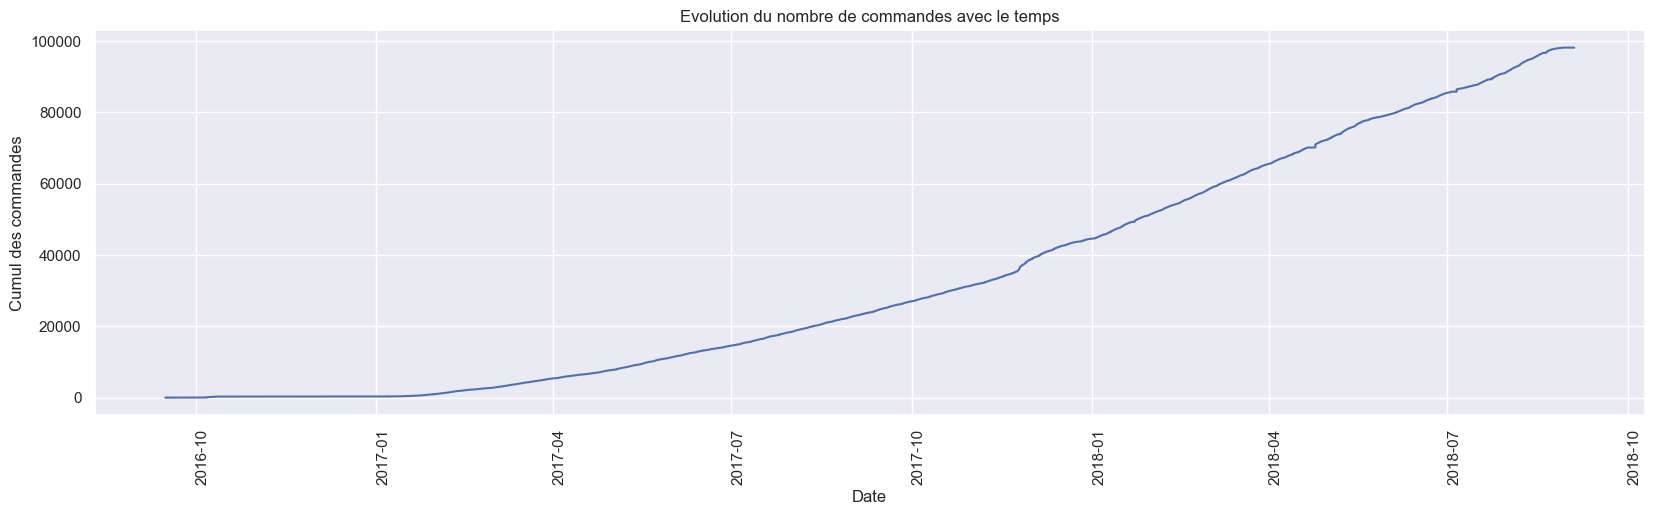

In [56]:
sns.set(font_scale=1)
plt.figure(figsize=(20, 5))

sns.lineplot(x='order_approved_at',
             y='number_of_orders',
             data=orders_by_time)
plt.xticks(rotation=90, ha='right', rotation_mode='anchor')
plt.xlabel("Date")
plt.ylabel("Cumul des commandes")
plt.title('Evolution du nombre de commandes avec le temps')
plt.show()

L'évolution est croissante.

Voyons la proportion du nombre de clients par nombre de commandes.

In [57]:
# replace values superior to 4 by >4
df_draw = customers_df.copy()
df_draw.loc[df_draw['total_orders'] > 4] = '>4'
df_draw = df_draw.astype({"total_orders": str})

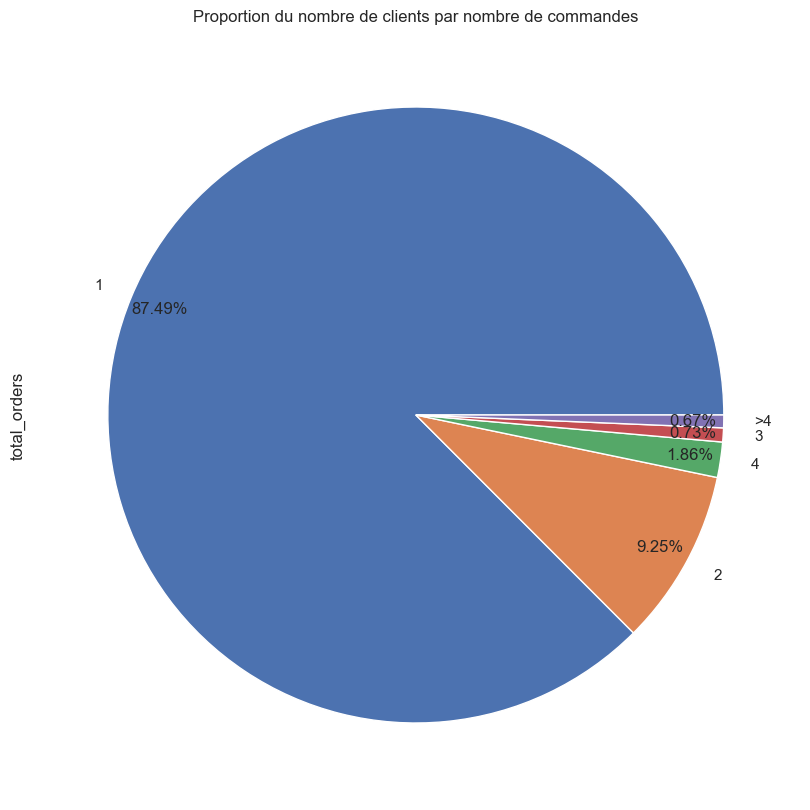

In [58]:
plt.figure(figsize=(10, 10))
labels = df_draw['total_orders'].unique().tolist()
df_draw['total_orders'].value_counts(normalize=True).sort_index().plot(
    kind='pie', labels=labels, autopct='%.2f%%', pctdistance=0.9)
plt.title("Proportion du nombre de clients par nombre de commandes")
plt.show()

La majorité des clients n'a fait qu'une seule commande.

Voyons l'évolution du chiffre d'affaire dans le temps.

In [59]:
# group datas by last_order and total_price to create revenues_time dataframe
revenues_time = customers_df[["last_order", "total_price"]].groupby(
    "last_order").sum().reset_index()
revenues_time = revenues_time.sort_values(by=['last_order'])

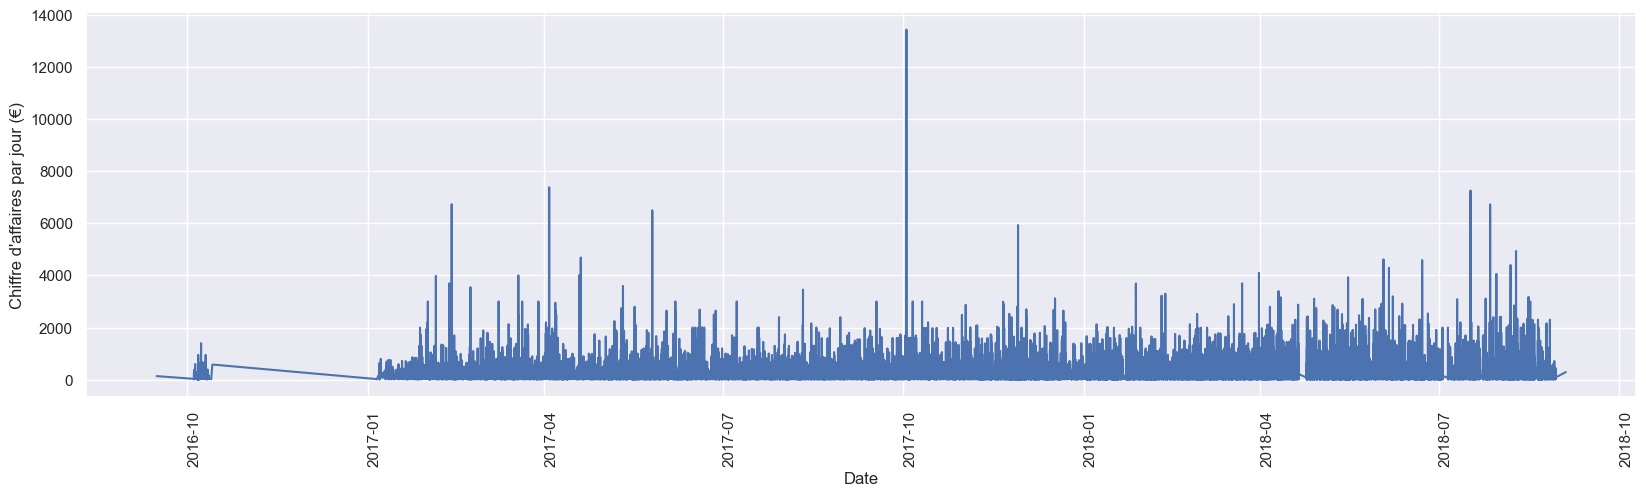

In [60]:
sns.set(font_scale=1)

plt.figure(figsize=(20, 5))

sns.lineplot(x='last_order',
             y='total_price',
             data=revenues_time)
plt.xticks(rotation=90, ha='right', rotation_mode='anchor')
plt.xlabel("Date")
plt.ylabel("Chiffre d'affaires par jour (€)")
plt.show()

On ne voit pas de période particulière qui se détache sauf un creux entre octobre 2016 et janvier 2017 où il n'y a pas eu de commandes, donc pas de chiffre d'affaire et un pic en octobre 2017. Il faudra prendre en compte cette période de creux dans la modélisation.

### 3.3. Corrélations

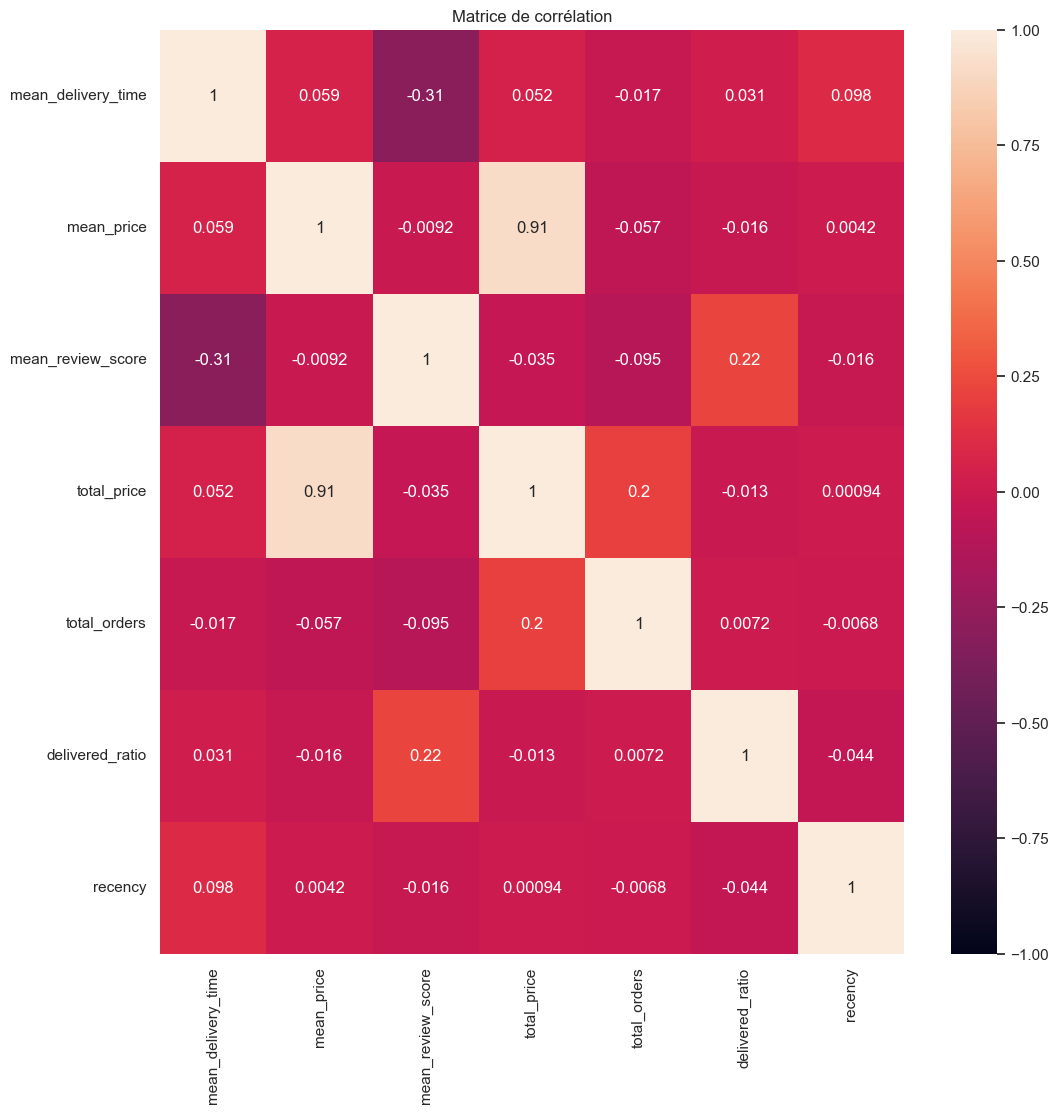

In [61]:
# select quantitative features
data = customers_df[['mean_delivery_time', 'mean_price', 'mean_review_score',
                     'total_price', 'total_orders', 'delivered_ratio', 'recency']]
fig = plt.figure(1, figsize=(12, 12))
sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
plt.yticks(rotation=0, rotation_mode='anchor')
plt.title('Matrice de corrélation')
plt.show()

Le prix total et le prix moyen sont corrélés entre eux.
Le review score est en partie corrélé positivement aux ratio de commandes livrées et négativement par le temps moyen de livraison.

## 4. Création du jeu de données final

Je supprime la variable catégorielle customer_unique_id et la variable redondante delivered_count.

In [62]:
customers_df.drop(['customer_unique_id', 'delivered_count'],
                  axis=1, inplace=True)

Voyons un peu la répartition pour chaque variable :

In [63]:
customers_df.head()

,last_order,mean_delivery_time,mean_price,mean_review_score,total_price,total_orders,delivered_ratio,recency
0,2018-05-10 11:11:18,6.400914,129.90,5.0,129.90,1,1.0,116.0
1,2018-05-07 18:25:44,2.984005,18.90,4.0,18.90,1,1.0,118.0
2,2017-03-10 21:05:03,25.731759,69.00,3.0,69.00,1,1.0,541.0
3,2017-10-12 20:49:17,20.023472,25.99,4.0,25.99,1,1.0,325.0
4,2017-11-14 20:06:52,13.126435,180.00,5.0,180.00,1,1.0,292.0


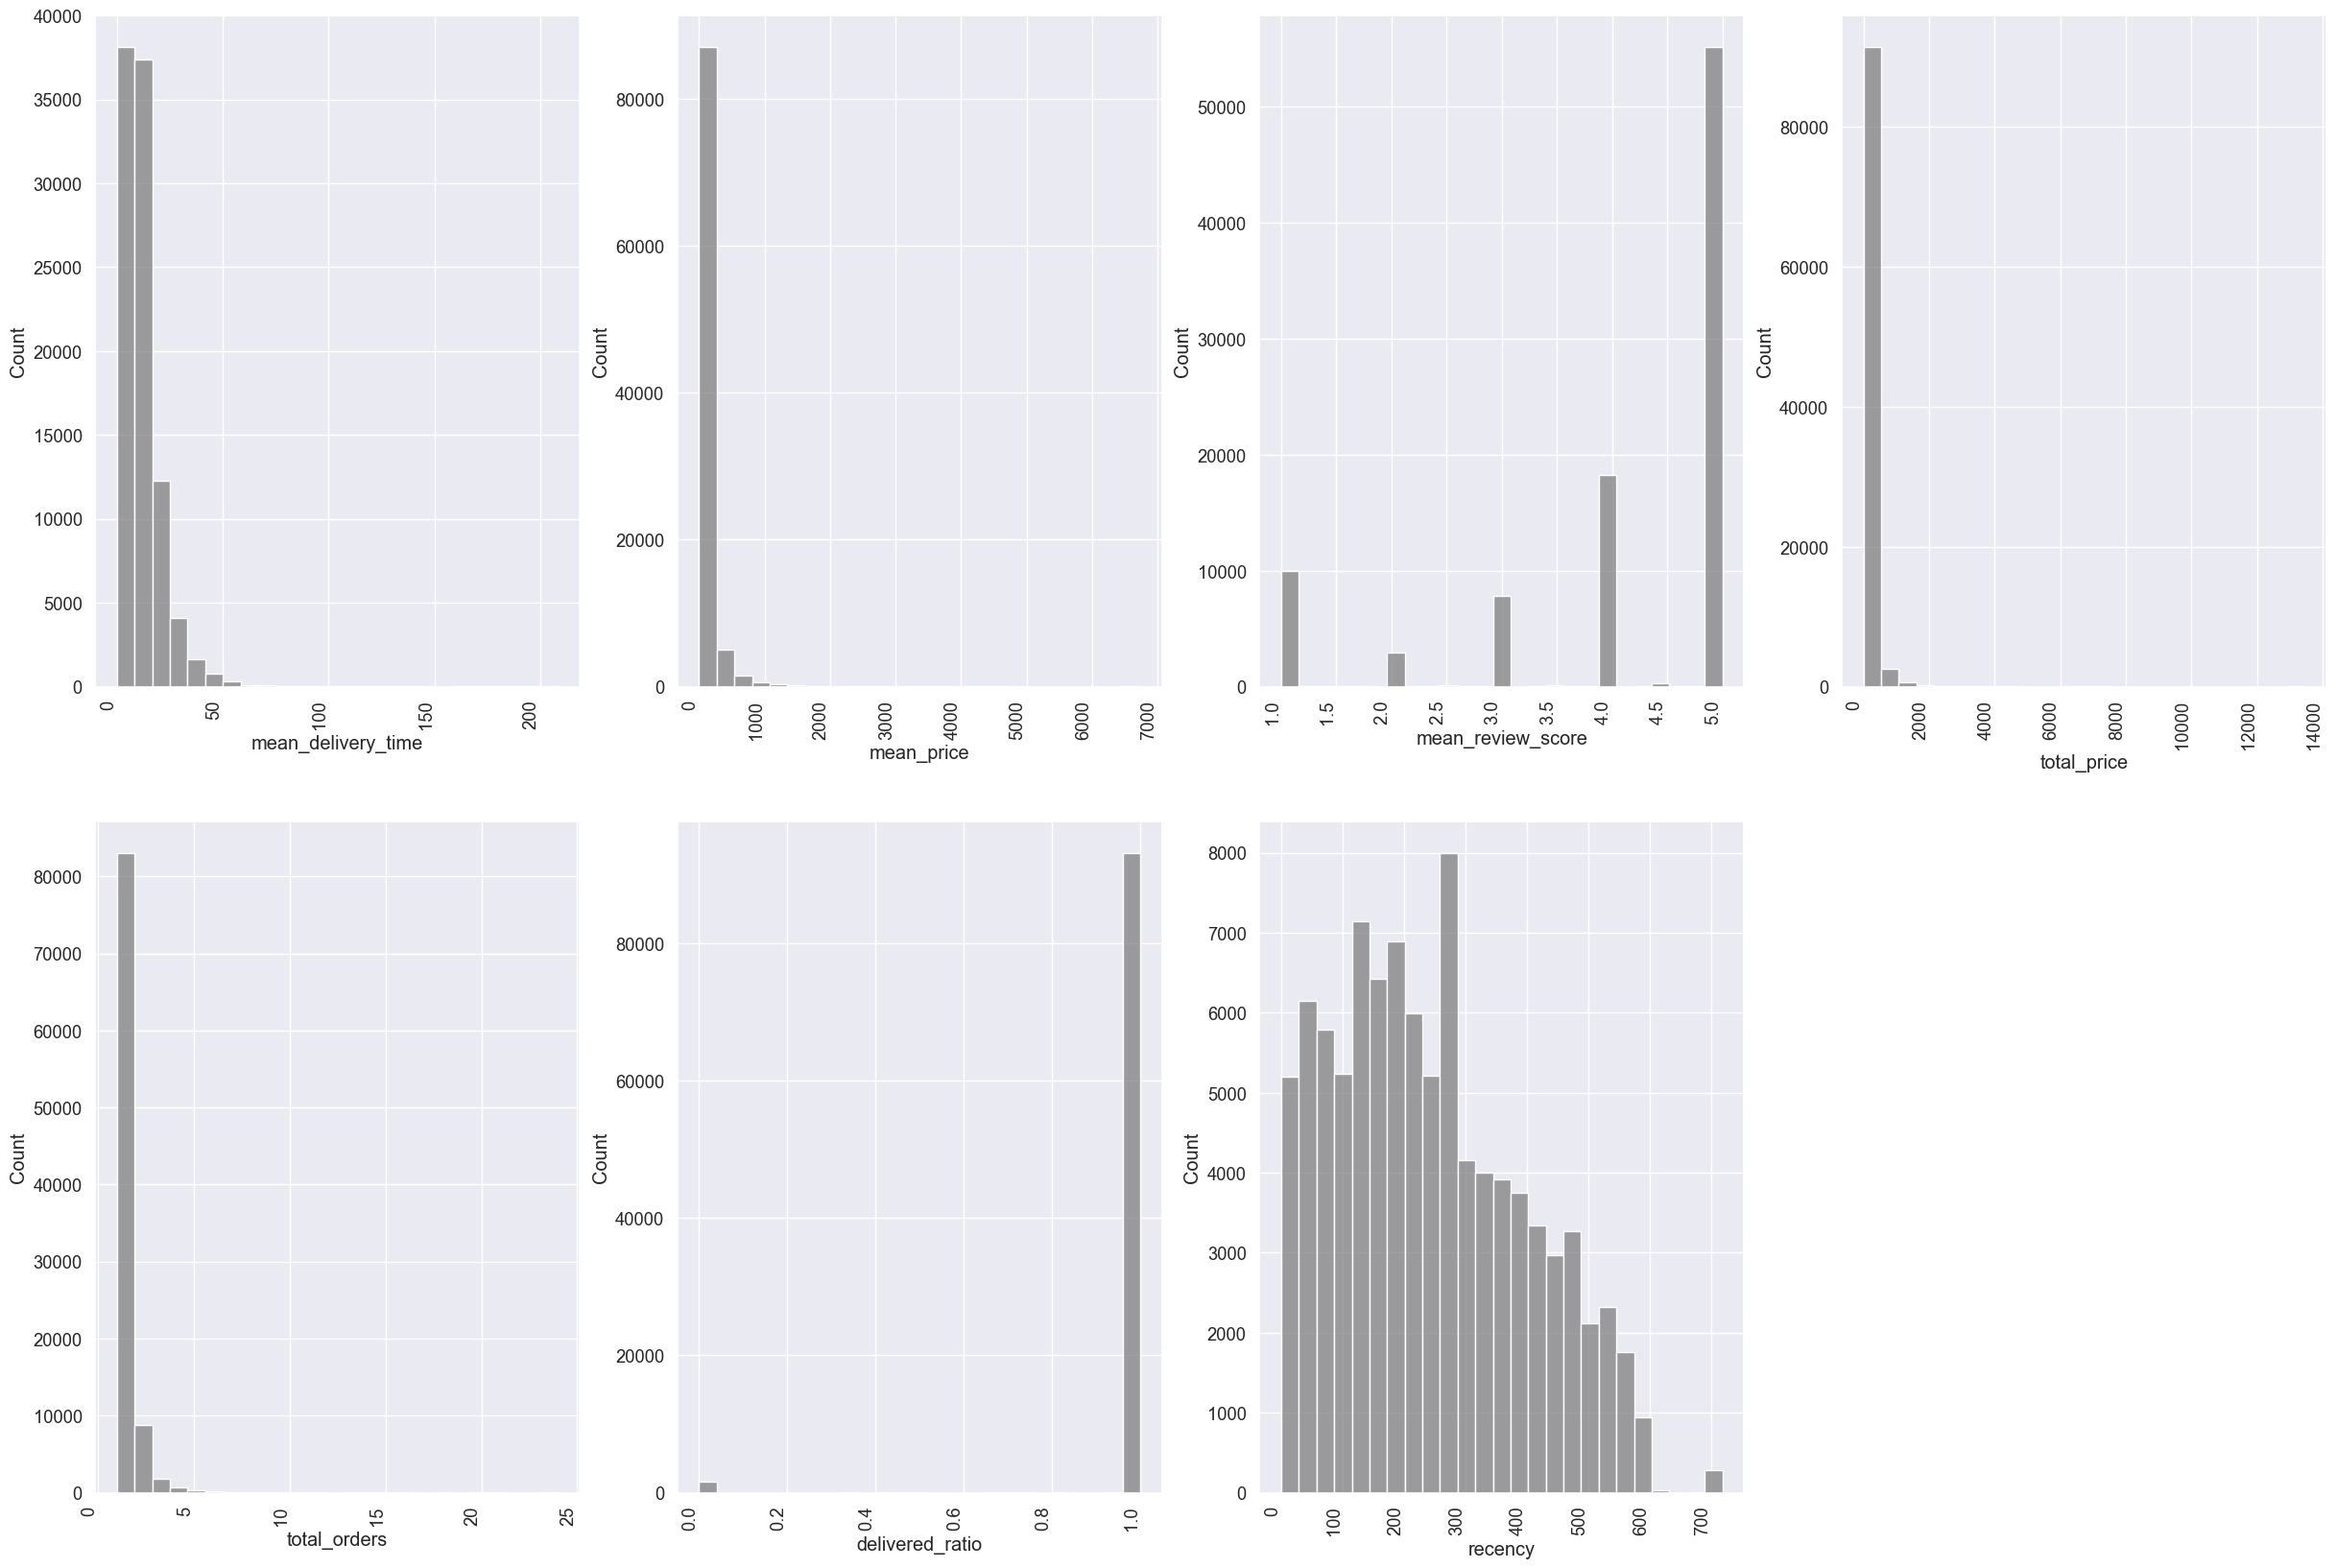

In [64]:
# quantitative features
variables = ['mean_delivery_time', 'mean_price', 'mean_review_score',
             'total_price', 'total_orders', 'delivered_ratio', 'recency']

sns.set(font_scale=1.2)

plt.figure(figsize=(30, 20))

for i in range(len(variables)):
    col = variables[i]
    ax = plt.subplot(2, 4, i + 1)
    sns.histplot(data=customers_df, x=col,
                 bins=25,
                 color="grey")
    plt.xticks(rotation=90, ha='right')

plt.show()

Et voyons maintenant ce que cela donne si l'on applique un logarithme sur ces variables.

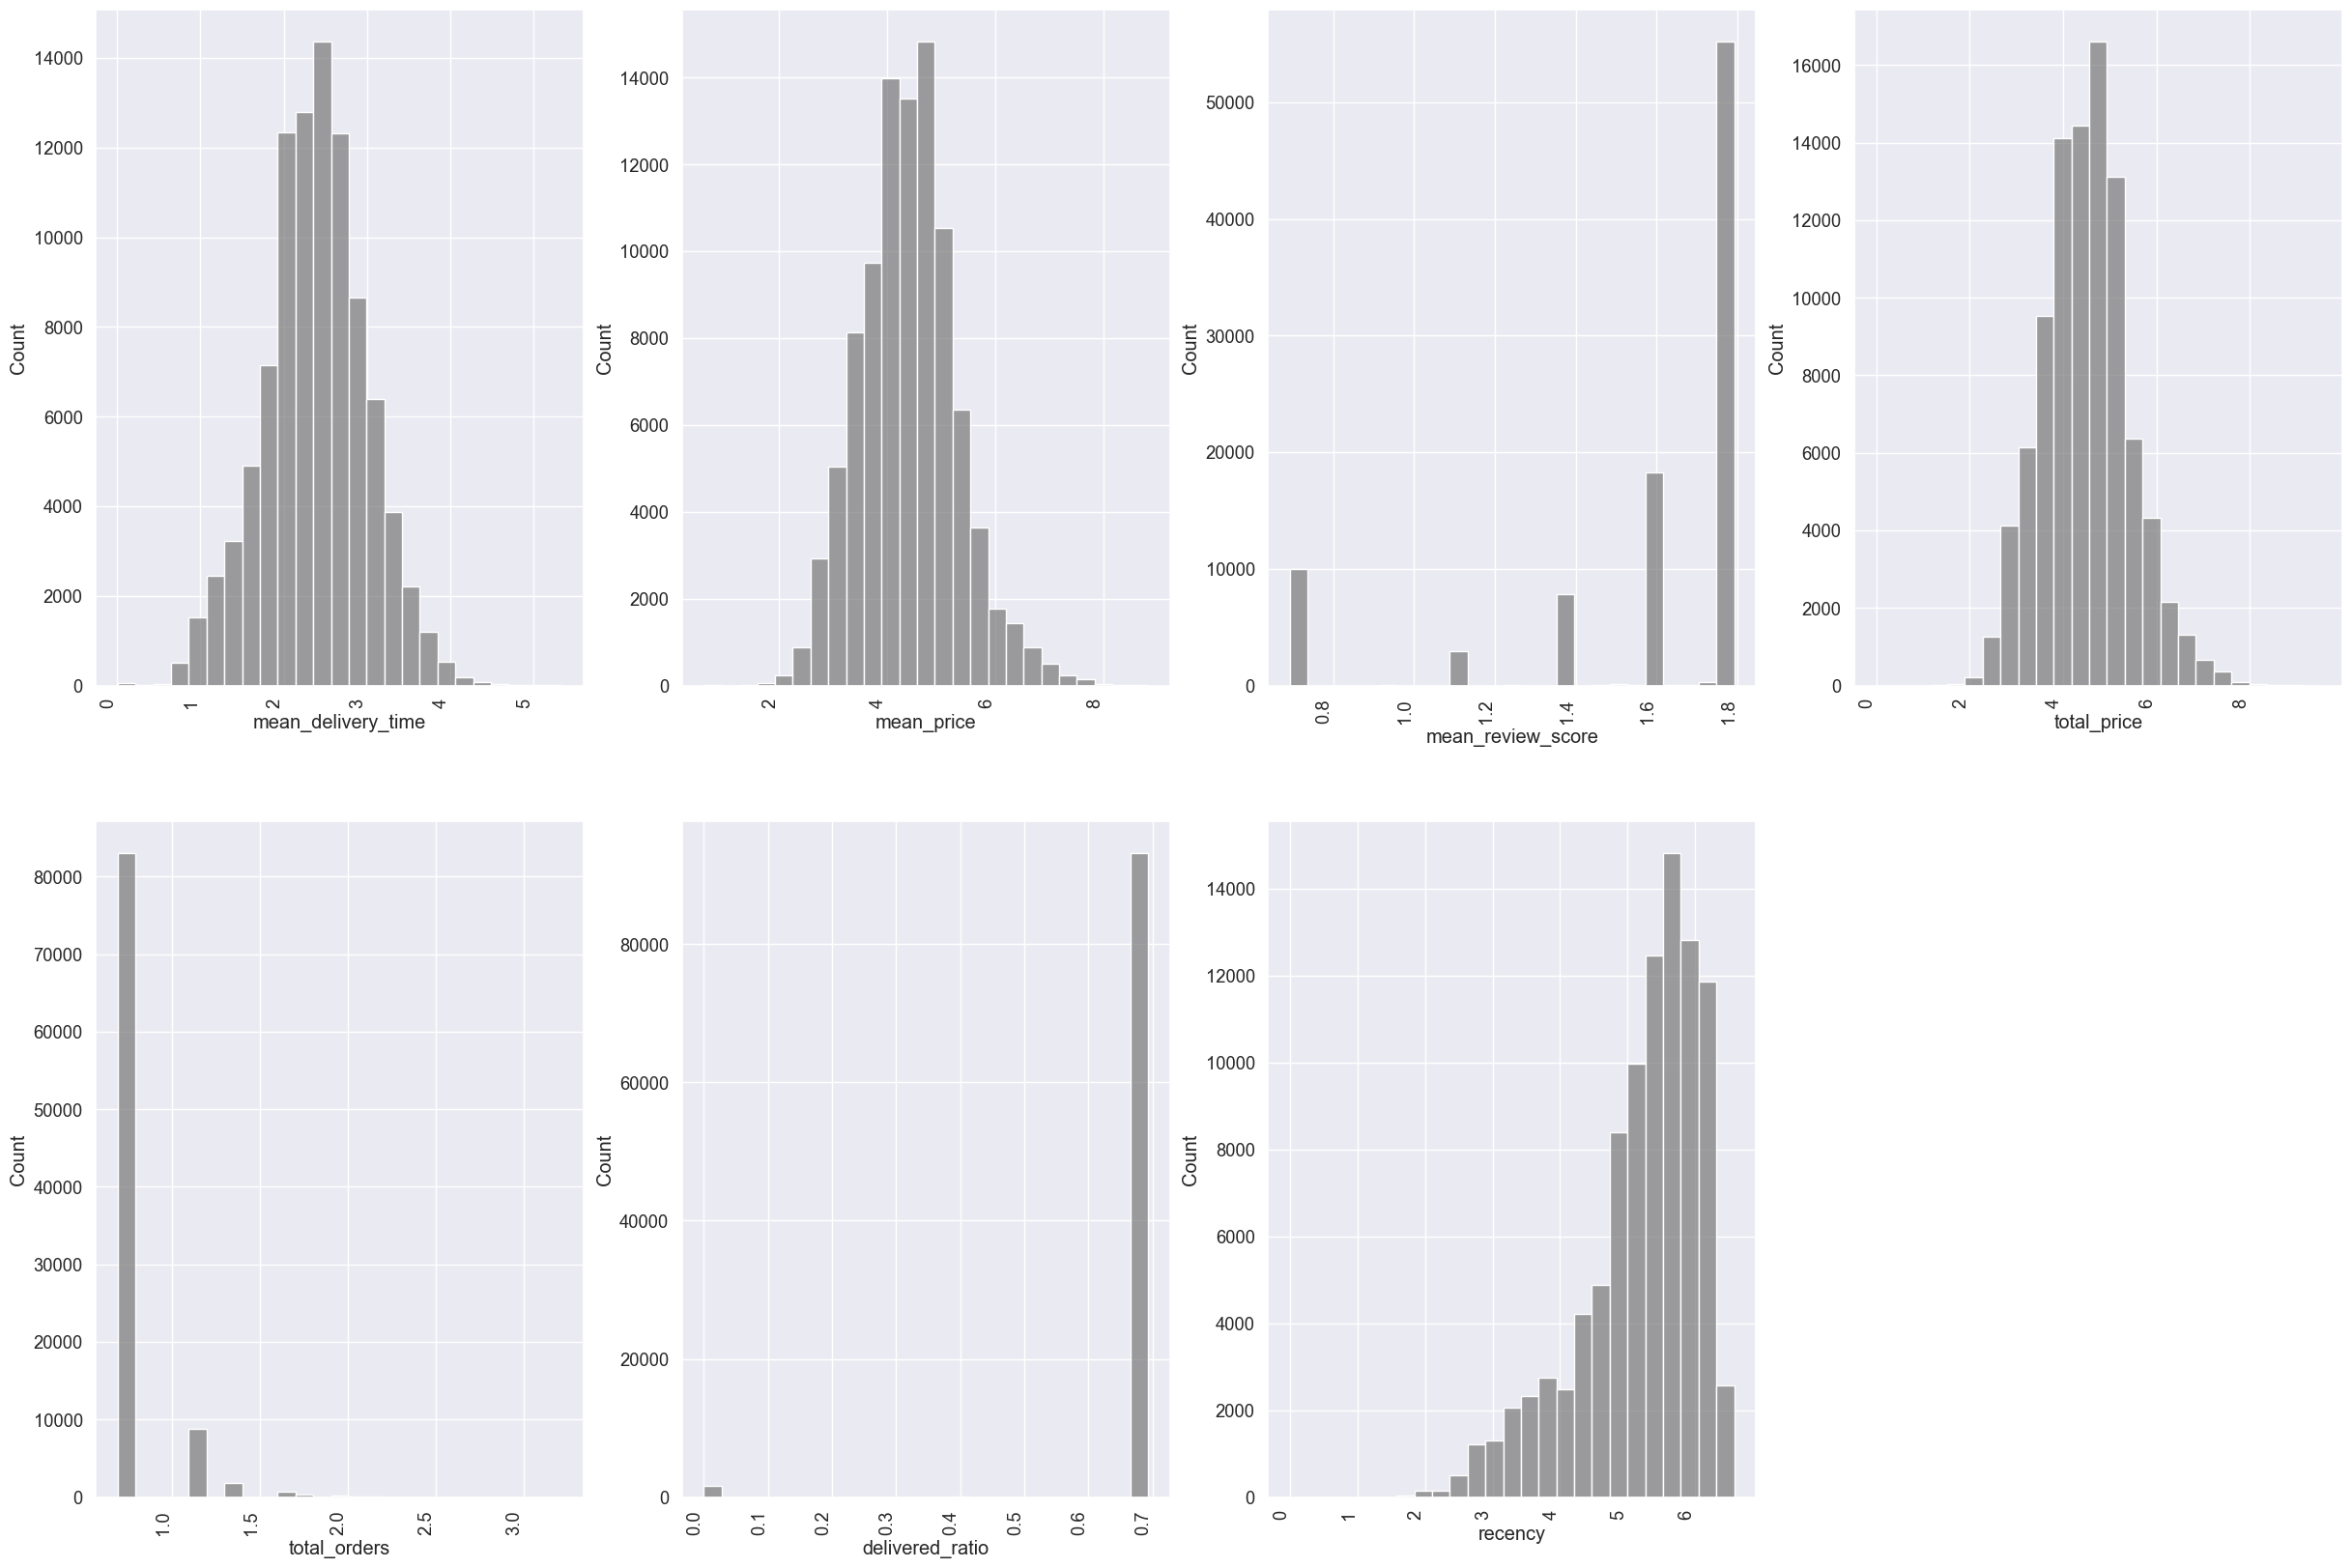

In [65]:
log_customers_df = customers_df.copy()

# log each feature
for columns in variables:
    log_customers_df[columns] = np.log1p(log_customers_df[columns])

sns.set(font_scale=1.2)

plt.figure(figsize=(30, 20))

for i in range(len(variables)):
    col = variables[i]
    ax = plt.subplot(2, 4, i + 1)
    sns.histplot(data=log_customers_df, x=col,
                 bins=25,
                 color="grey")
    plt.xticks(rotation=90, ha='right')

plt.show()

Le logarithme est inutile sur les variables qui étaient catégorielles.

Le logarithme a un effet sur la distribution de mean_delivery_time, mean_price, total_price et recency.

Transformons ces variables dans le jeu de données final.

In [66]:
final_df = customers_df.copy()

# features to log
to_log = ['mean_delivery_time', 'mean_price', 'total_price', 'recency']

for columns in to_log:
    final_df[columns] = np.log1p(final_df[columns])

In [67]:
final_df.head()

,last_order,mean_delivery_time,mean_price,mean_review_score,total_price,total_orders,delivered_ratio,recency
0,2018-05-10 11:11:18,2.001604,4.874434,5.0,4.874434,1,1.0,4.762174
1,2018-05-07 18:25:44,1.382288,2.990720,4.0,2.990720,1,1.0,4.779123
2,2017-03-10 21:05:03,3.285852,4.248495,3.0,4.248495,1,1.0,6.295266
3,2017-10-12 20:49:17,3.045640,3.295466,4.0,3.295466,1,1.0,5.786897
4,2017-11-14 20:06:52,2.648048,5.198497,5.0,5.198497,1,1.0,5.680173


Il ne reste plus qu'à exporter le DataFrame en fichier csv pour la suite de l'étude.

In [68]:
path = "data/cleaned/"
filename = "final_data.csv"

In [69]:
# export csv file
final_df.to_csv(path+filename, index=False)